In [12]:
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy

from scipy.stats import probplot
from scipy import stats
#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [16]:
nation = '한국 영국 독일 미국 프랑스 호주 스웨덴 일본 OECD_평균'
death = '2.6 0.7 0.7 1.3 1.0 0.8 0.5 0.7 1.1'

nation = list(nation.split(' '))
death = list(map(float, death.split(' ')))
print(len(nation))
print(len(death))

a = pd.DataFrame([death] , columns = nation) #꼭 기억하자
a

9
9


,한국,영국,독일,미국,프랑스,호주,스웨덴,일본,OECD_평균
0,2.6,0.7,0.7,1.3,1.0,0.8,0.5,0.7,1.1


In [22]:
print(nation[:-1])

['한국', '영국', '독일', '미국', '프랑스', '호주', '스웨덴', '일본']


2.6
0.7
0.7
1.3
1.0
0.8
0.5
0.7


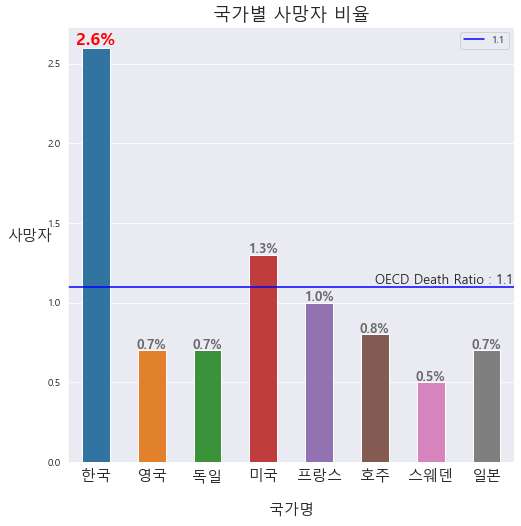

In [43]:
fig = plt.figure(figsize = (8,8))
ax3 = plt.plot(figsize = (8,8))
fig.set_facecolor('white')

ax3 = sns.barplot(x=nation[:-1] , y=death[:-1])
ax3.set_title('국가별 사망자 비율' , fontsize= 18)
ax3.set_xlabel('국가명' , rotation = 0 , fontsize= 15 , labelpad=18)
ax3.set_ylabel('사망자', rotation = 0 , fontsize = 15 , labelpad=18)
ax3.set_xticklabels(nation[:-1], rotation = 0 , fontsize= 15)

ax3.axhline(y=death[-1] , xmin=0 , xmax=1 , color = 'blue' , linestyle ='solid' , label ='{}'.format(death[-1]))
ax3.text(5, death[-1]+0.02,f'OECD Death Ratio : {death[-1]}',fontsize=13)
#(x좌표 , y좌표, 기준선 이름)
ax3.legend()
#기준선 추가하기
width = 0.5
# 막대기의 두께 in Seaborn
for bar in ax3.patches:
    x = bar.get_x() # 막대 좌측 하단 x 좌표
    old_width = bar.get_width() # 기존 막대 폭
    bar.set_width(width) # 폭변경
    bar.set_x(x+(old_width-width)/2) # 막대 좌측 하단 x 좌표 업데이트
#
for i,txt in enumerate(death[:-1]):
    b = txt
    print(b)
    if  b == max(death[:-1]):
        ax3.text(i, b+0.02, str(txt)+'%' , ha='center' , color = 'red' , fontweight = 'bold' , fontsize=17)
        #어디 막대, 막대기의 위쪽에
    else:
        ax3.text(i, b+0.01, str(txt)+'%' , ha='center' , color = 'dimgray' , fontsize=13 , fontweight = 'bold')
plt.show()